<a href="https://colab.research.google.com/github/lcbjrrr/quant/blob/master/J_Cluster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Topic:** AI/ML

**Title:** Clustering (KMeans)

**Author:** Luiz Barboza

**Date:** 20/dec/22

**Lang:** Julia

**Site:** https://quant-research.group/

**Email:** contato@quant-research.group


# Julia Installation

In [ ]:
%%shell
set -e

#---------------------------------------------------#
JULIA_VERSION="1.8.3" # any version ≥ 0.7.0
JULIA_PACKAGES="IJulia BenchmarkTools"
JULIA_PACKAGES_IF_GPU="CUDA" # or CuArrays for older Julia versions
JULIA_NUM_THREADS=2
#---------------------------------------------------#

if [ -z `which julia` ]; then
  # Install Julia
  JULIA_VER=`cut -d '.' -f -2 <<< "$JULIA_VERSION"`
  echo "Installing Julia $JULIA_VERSION on the current Colab Runtime..."
  BASE_URL="https://julialang-s3.julialang.org/bin/linux/x64"
  URL="$BASE_URL/$JULIA_VER/julia-$JULIA_VERSION-linux-x86_64.tar.gz"
  wget -nv $URL -O /tmp/julia.tar.gz # -nv means "not verbose"
  tar -x -f /tmp/julia.tar.gz -C /usr/local --strip-components 1
  rm /tmp/julia.tar.gz

  # Install Packages
  nvidia-smi -L &> /dev/null && export GPU=1 || export GPU=0
  if [ $GPU -eq 1 ]; then
    JULIA_PACKAGES="$JULIA_PACKAGES $JULIA_PACKAGES_IF_GPU"
  fi
  for PKG in `echo $JULIA_PACKAGES`; do
    echo "Installing Julia package $PKG..."
    julia -e 'using Pkg; pkg"add '$PKG'; precompile;"' &> /dev/null
  done

  # Install kernel and rename it to "julia"
  echo "Installing IJulia kernel..."
  julia -e 'using IJulia; IJulia.installkernel("julia", env=Dict(
      "JULIA_NUM_THREADS"=>"'"$JULIA_NUM_THREADS"'"))'
  KERNEL_DIR=`julia -e "using IJulia; print(IJulia.kerneldir())"`
  KERNEL_NAME=`ls -d "$KERNEL_DIR"/julia*`
  mv -f $KERNEL_NAME "$KERNEL_DIR"/julia  

  echo ''
  echo "Successfully installed `julia -v`!"
  echo "Please reload this page (press Ctrl+R, ⌘+R, or the F5 key) then"
  echo "jump to the 'Checking the Installation' section."
fi

Installing Julia 1.8.3 on the current Colab Runtime...
2023-01-05 20:55:25 URL:https://storage.googleapis.com/julialang2/bin/linux/x64/1.8/julia-1.8.3-linux-x86_64.tar.gz [130030846/130030846] -> "/tmp/julia.tar.gz" [1]
Installing Julia package IJulia...
Installing Julia package BenchmarkTools...
Installing IJulia kernel...
[ Info: Installing julia kernelspec in /root/.local/share/jupyter/kernels/julia-1.8

Please reload this page (press Ctrl+R, ⌘+R, or the F5 key) then
jump to the 'Checking the Installation' section.


In [1]:
versioninfo()

Julia Version 1.8.3
Commit 0434deb161e (2022-11-14 20:14 UTC)
Platform Info:
  OS: Linux (x86_64-linux-gnu)
  CPU: 2 × AMD EPYC 7B12
  WORD_SIZE: 64
  LIBM: libopenlibm
  LLVM: libLLVM-13.0.1 (ORCJIT, znver2)
  Threads: 2 on 2 virtual cores
Environment:
  LD_LIBRARY_PATH = /usr/local/nvidia/lib:/usr/local/nvidia/lib64
  LD_PRELOAD = /usr/lib/x86_64-linux-gnu/libtcmalloc.so.4
  JULIA_NUM_THREADS = 2


# Custering

In [ ]:
import Pkg
Pkg.add("CSV")
Pkg.add("DataFrames")
Pkg.add("Statistics")
Pkg.add("StatsPlots")
Pkg.add("Lathe") 
Pkg.add("Clustering") 

using CSV
using DataFrames
using Statistics
using StatsPlots
using Lathe
using Lathe.preprocess: TrainTestSplit
using Clustering


In [ ]:
;wget https://raw.githubusercontent.com/lcbjrrr/data/main/banking%20-%20ctr.csv

In [6]:
;wget https://raw.githubusercontent.com/lcbjrrr/data/main/banking%20-%20cts.csv

--2023-01-05 21:04:26--  https://raw.githubusercontent.com/lcbjrrr/data/main/banking%20-%20cts.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 182 [text/plain]
Saving to: ‘banking - cts.csv.1’

     0K                                                       100% 6.89M=0s

2023-01-05 21:04:26 (6.89 MB/s) - ‘banking - cts.csv.1’ saved [182/182]



In [8]:
#read training data
train=CSV.read("banking - ctr.csv", DataFrame)
first(train,5)
#df=CSV.read("cluster - all.csv", DataFrame)
#train, test = TrainTestSplit(df,.70)

,salary,balance
,Int64,Int64
1,2919,239
2,4677,1565
3,2229,1855
4,4527,466
5,1751,357


In [9]:
#read testing data
test=CSV.read("banking - cts.csv", DataFrame)
first(test,5)

,salary,balance
,Float64,Float64
1,3016.57,240.95
2,2305.87,1937.75
3,4672.81,479.3
4,2417.11,-1166.05
5,5020.95,-1969.3


## KMeans

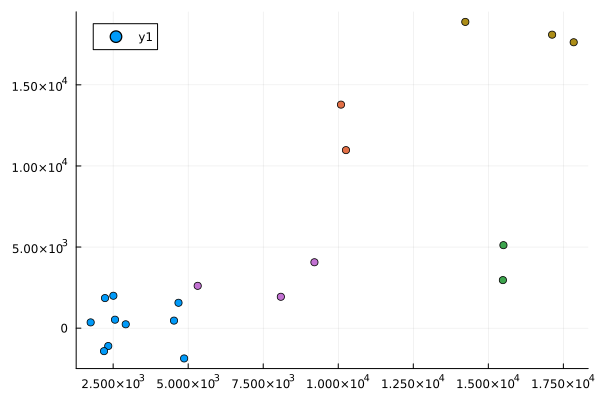

In [10]:
pred_train = kmeans(Matrix(train[!,[:salary,  :balance]])', 5).assignments
scatter(train.salary,train.balance,color=pred_train)

In [17]:
pred_test = kmeans(Matrix(test[!,[:salary,  :balance]])', 4).assignments

10-element Vector{Int64}:
 1
 1
 1
 1
 1
 1
 3
 4
 1
 2

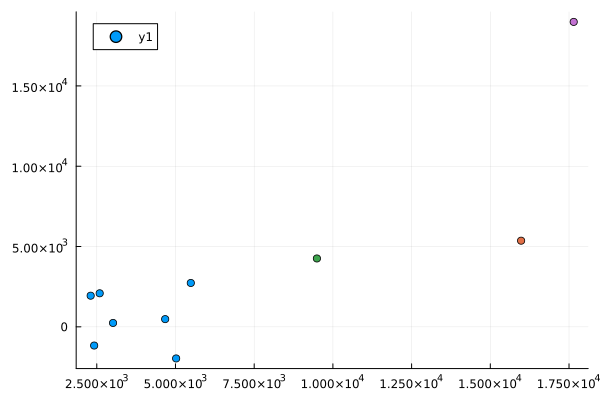

In [18]:
scatter(test.salary,test.balance,color=pred_test)